<a href="https://colab.research.google.com/github/skhetrapal/kaggle_projects/blob/main/Kaggle_academic_success_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train_path = '/content/drive/My Drive/Colab data/Kaggle/academic-success-classification/train.csv'
test_path = '/content/drive/My Drive/Colab data/Kaggle/academic-success-classification/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
train_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [ ]:
test_df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

In [ ]:
train_df['Target'].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

In [ ]:
test_df['Target'] = 'XX'

In [ ]:
df = pd.concat([train_df,test_df],axis = 0)
df.shape[0] == train_df.shape[0] + test_df.shape[0]

True

In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('***'*10)

id
[     0      1      2 ... 127527 127528 127529]
******************************
Marital status
[1 2 4 3 5 6]
******************************
Application mode
[ 1 17 39 44  7 18 15 16 53 43 51 42 10  5 12 27  2 26  4 35  9  3 14 19]
******************************
Application order
[1 2 3 6 4 5 0 9]
******************************
Course
[9238 9254 9500  171 9085 9773 9003 9853 9147 9670 8014 9119 9991 9130
 9556 9070   33  979   39 7500 9257 2105 4147]
******************************
Daytime/evening attendance
[1 0]
******************************
Previous qualification
[ 1 19 39 40 12  3  2 42  4  9 11  6 15 38 10 43 14 37  5 36 17 16]
******************************
Previous qualification (grade)
[126.  125.  137.  131.  132.  133.1 130.  135.  120.  140.  154.  133.
 151.  122.  138.  145.  139.  110.  114.  129.  128.  150.  143.  117.
 161.  121.  141.  147.  134.  113.  160.  100.  136.  168.  108.  124.
 155.  118.  149.  156.  116.  115.  123.  142.  127.  146.  144.  109.
 152.  1

In [ ]:
mapping = {'Graduate':2, 'Dropout':0, 'Enrolled':1, 'XX':-1}
df['Target'] = df['Target'].map(mapping)

<Axes: >

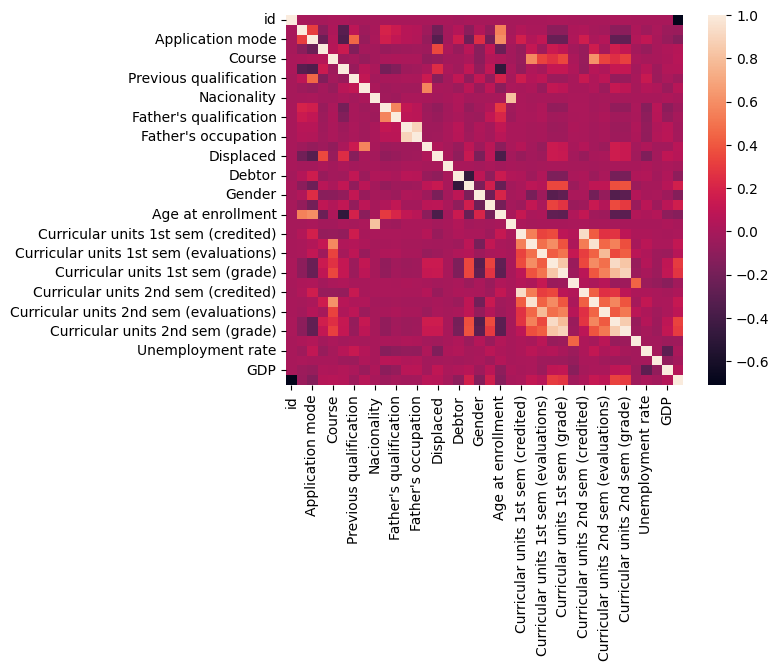

In [ ]:
sns.heatmap(df.corr())

In [ ]:
col_list = []
feature_engg = pd.DataFrame(df['id'],columns = ['id'])

for col in df.columns:
  if 'Curricular' in col:
    feature_engg = pd.concat([feature_engg, df[col]],axis = 1)

In [ ]:
feature_engg = feature_engg.set_index('id')

In [ ]:
feature_engg['Curricular sum'] = feature_engg.sum(axis = 1)

In [ ]:
feature_engg.head()

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Curricular sum
id,,,,,,,,,,,,,
0,0,6,6,6,14.500000,0,0,6,7,6,12.428571,0,63.928571
1,0,6,8,4,11.600000,0,0,6,9,0,0.000000,0,44.600000
2,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,12.000000
3,0,7,9,7,12.591250,0,0,8,11,7,12.820000,0,74.411250
4,0,7,12,6,12.933333,0,0,7,12,6,12.933333,0,75.866667


In [ ]:
col_list = ['Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)']

In [ ]:
df['Curricular sum'] = feature_engg['Curricular sum']
df = df.drop(columns = col_list)

In [ ]:
df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Curricular sum
0,0,1,1,1,9238,1,1,126.0,1,1,...,1,0,1,18,0,11.1,0.6,2.02,2,63.928571
1,1,1,17,1,9238,1,1,125.0,1,19,...,1,0,0,18,0,11.1,0.6,2.02,0,44.600000
2,2,1,17,2,9254,1,1,137.0,1,3,...,1,1,0,18,0,16.2,0.3,-0.92,0,12.000000
3,3,1,1,3,9500,1,1,131.0,1,19,...,1,0,1,18,0,11.1,0.6,2.02,1,74.411250
4,4,1,1,2,9500,1,1,132.0,1,19,...,1,0,0,18,0,7.6,2.6,0.32,2,75.866667


In [ ]:
df_train = df[:len(train_df)]
df_test = df[len(train_df):]
df_test = df_test.drop(columns = 'Target')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

X = df_train.drop(columns = 'Target')
y = df_train['Target']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_pred, y_val)
print(accuracy)

0.6751829587036069


In [ ]:
model_1 = OneVsOneClassifier(LinearSVC(random_state=0) )
model_1.fit(X_train,y_train)
y_pred = model_1.predict(X_val)
accuracy = accuracy_score(y_pred, y_val)
print(accuracy)

0.6995556717198118


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(X)

check = sm.OLS(y,X).fit()

print(check.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     3497.
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:53:03   Log-Likelihood:                -69301.
No. Observations:               76518   AIC:                         1.387e+05
Df Residuals:                   76491   BIC:                         1.389e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Marital status'}>,
        <Axes: title={'center': 'Application mode'}>,
        <Axes: title={'center': 'Application order'}>,
        <Axes: title={'center': 'Course'}>],
       [<Axes: title={'center': 'Daytime/evening attendance'}>,
        <Axes: title={'center': 'Previous qualification'}>,
        <Axes: title={'center': 'Previous qualification (grade)'}>,
        <Axes: title={'center': 'Nacionality'}>,
        <Axes: title={'center': "Mother's qualification"}>],
       [<Axes: title={'center': "Father's qualification"}>,
        <Axes: title={'center': "Mother's occupation"}>,
        <Axes: title={'center': "Father's occupation"}>,
        <Axes: title={'center': 'Admission grade'}>,
        <Axes: title={'center': 'Displaced'}>],
       [<Axes: title={'center': 'Educational special needs'}>,
        <Axes: title={'center': 'Debtor'}>,
        <Axes: title={'center': 'Tuition fees up to date'}>,
        <

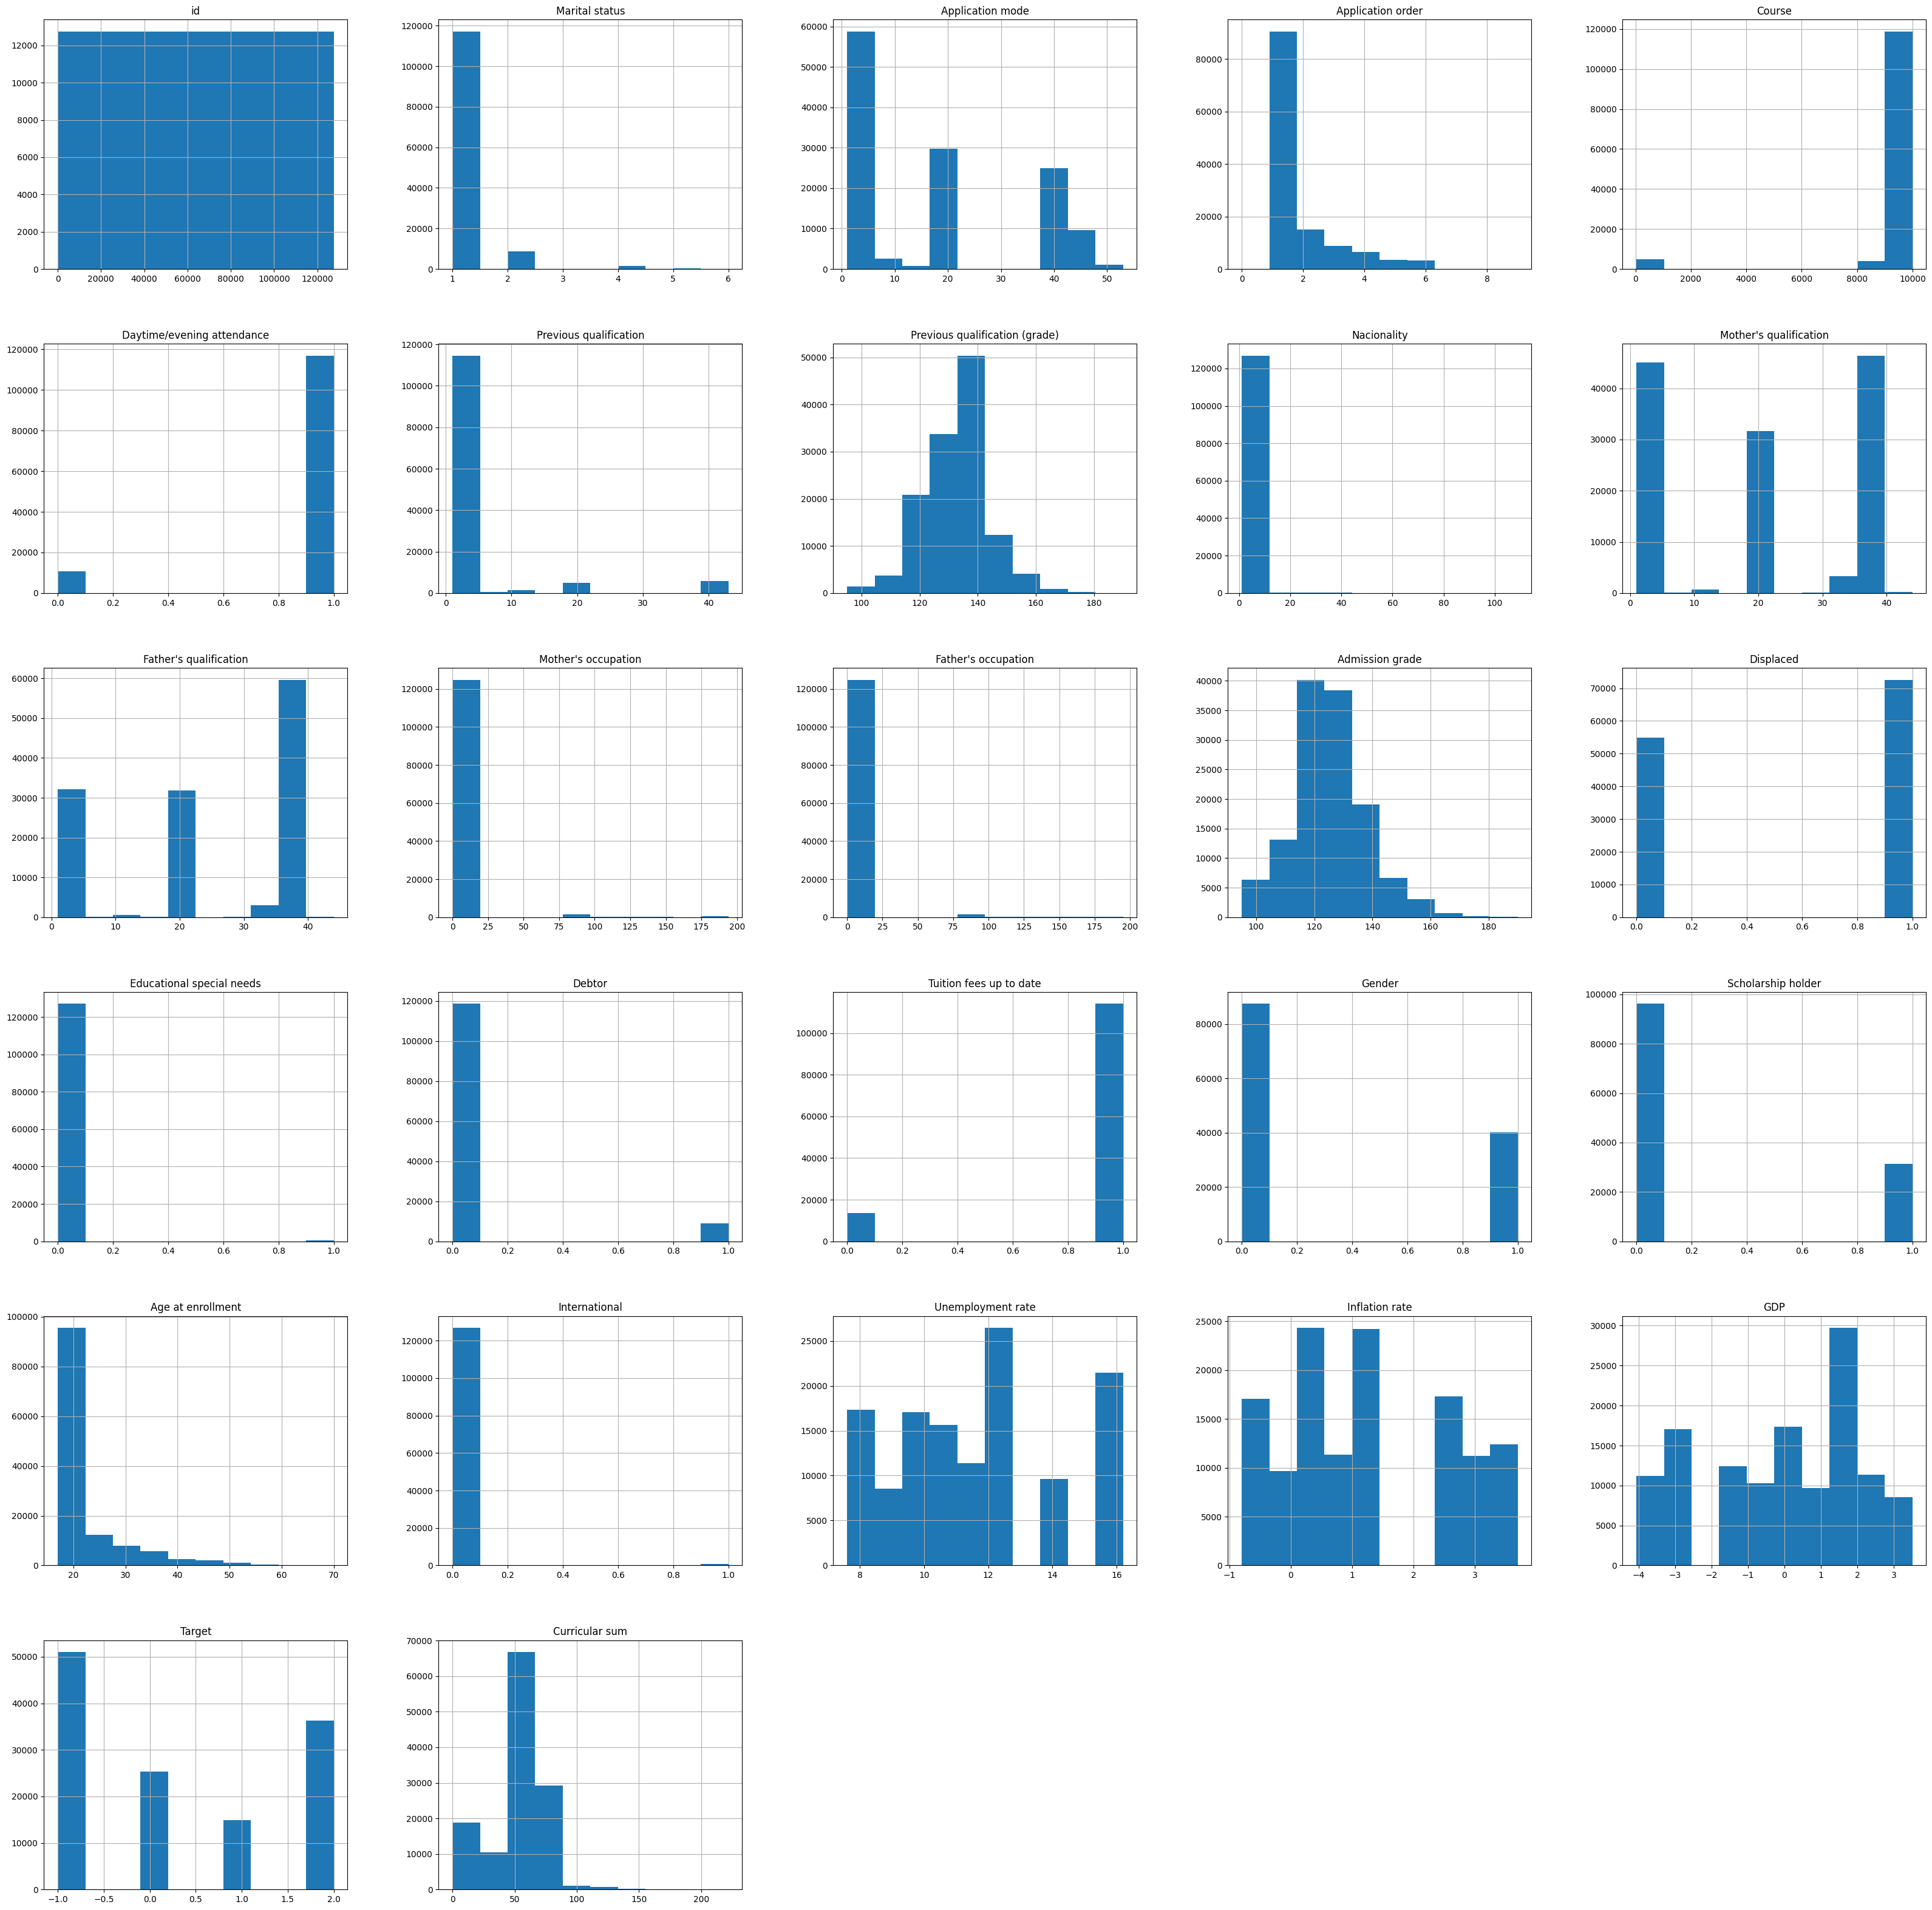

In [ ]:
df.hist(figsize = (40,40))